## AI Final Project (Data Notebook)

Yutai Li, Coco Yu\
Data source: https://www.kaggle.com/datasets/debanga/facial-expression-recognition-challenge
`
This project is aimed at classifying images into seven categories: anger, disgust, fear, happiness, sadness, surprise and neutral. The original data contain 35,887 instances including three columns: emotions (target), pixels (feature) and usage. The usage column is useless for our purpose (we plan to use sklearn package to split training and testing sets) and was therefore dropped. 3,369 duplicate values were found and taken out of the dataset. Number of instances for each target category can be found in the following codes. As there are some error images (e.g., image removed), we did some exploratory in the data and set a threshold of 230 for average pixels to remove these error images. For the purpose of our project, we only need gray scale images. As the original dataset is already on gray scale, we thereby did not manipulate the pixels.
`

In [1]:
import os
import math
import numpy as np
from numpy import random
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

In [2]:
os.getcwd()

'/Users/liyutai/GitHub/AI-Project'

In [3]:
os.chdir('/Users/liyutai/Desktop/AI in social science/FER')

In [4]:
face_df = pd.read_csv('icml_face_data.csv')
face_df.columns = ["emotion", "usage", "pixels"]
face_df.head()

,emotion,usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [5]:
face_df

,emotion,usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [6]:
#find duplicates
duplicates = face_df[face_df.duplicated(subset = 'pixels', keep=False)]
duplicates

,emotion,usage,pixels
30,3,Training,234 233 228 231 234 233 236 230 236 196 112 85...
38,0,Training,255 82 0 3 0 0 0 0 0 0 3 0 16 17 3 60 29 0 1 2...
50,2,Training,99 95 101 114 124 129 128 127 128 124 123 125 ...
62,3,Training,210 161 140 166 159 98 96 141 157 137 110 107 ...
69,5,Training,43 43 43 40 45 63 93 140 144 153 159 167 168 1...
...,...,...,...
35826,2,PrivateTest,200 201 199 197 198 199 199 198 197 196 194 19...
35833,5,PrivateTest,254 254 254 254 254 253 252 254 113 36 62 69 6...
35874,5,PrivateTest,43 43 51 73 94 97 102 95 99 107 126 144 154 17...
35875,5,PrivateTest,248 251 239 144 102 95 82 77 91 138 153 145 14...


In [7]:
duplicates[duplicates['pixels'] == duplicates.iloc[0,2]]

,emotion,usage,pixels
30,3,Training,234 233 228 231 234 233 236 230 236 196 112 85...
19215,3,Training,234 233 228 231 234 233 236 230 236 196 112 85...


In [8]:
len(duplicates)

3369

In [9]:
face_df = face_df.drop_duplicates(subset="pixels", keep='first')

In [10]:
face_df

,emotion,usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35881,0,PrivateTest,181 177 176 156 178 144 136 132 122 107 131 16...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...


In [11]:
face_df.iloc[:,1].value_counts()

Training       27473
PublicTest      3293
PrivateTest     3268
Name: usage, dtype: int64

In [12]:
face_df['emotion'].value_counts()

3    8796
6    6052
4    5922
2    4820
0    4727
5    3257
1     460
Name: emotion, dtype: int64

In [13]:
# take out the usage column
face_df = face_df[['emotion', 'pixels']]
face_df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [14]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

172


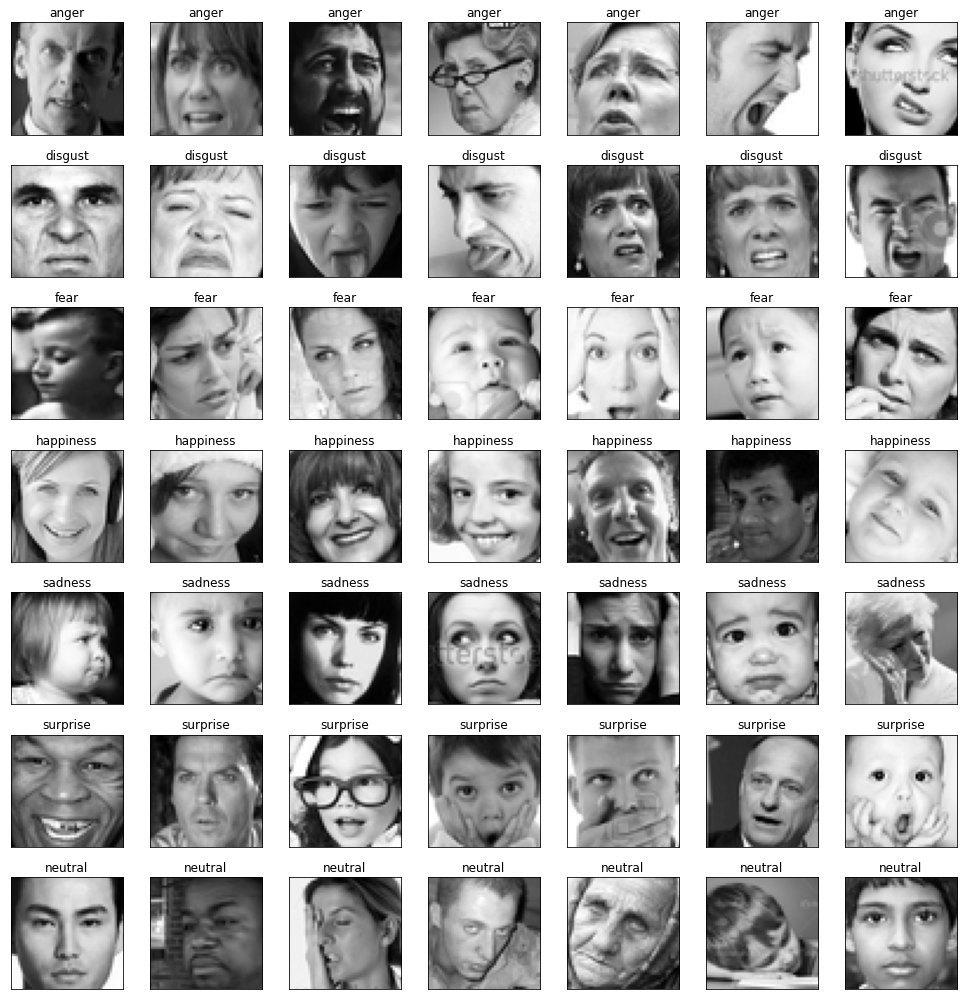

In [15]:
fig = pyplot.figure(1, (14, 14))

random.seed(0)
n = random.randint(0, high=460)
# n = 194
k = 0
print(n)

for label in sorted(face_df.emotion.unique()):
    for j in range(7):
        px = face_df[face_df.emotion==label].pixels.iloc[n]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        n += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()

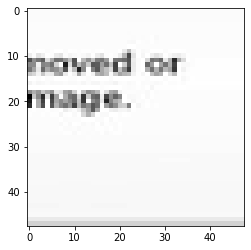

In [16]:
# error images
error_img = face_df[face_df.emotion==5].pixels.iloc[229]
error_img = np.array(error_img.split(' ')).reshape(48, 48).astype('float32')
ax = pyplot.subplot()
ax.imshow(error_img, cmap='gray')

In [17]:
error_img

array([[252., 252., 252., ..., 252., 252., 252.],
       [252., 252., 252., ..., 252., 252., 252.],
       [252., 252., 252., ..., 252., 252., 252.],
       ...,
       [251., 251., 251., ..., 251., 251., 251.],
       [241., 241., 241., ..., 241., 241., 241.],
       [225., 225., 225., ..., 225., 225., 225.]], dtype=float32)

In [18]:
np.average(error_img)

245.42578

In [19]:
random_pic = face_df['pixels'][0]
random_pic = np.array(random_pic.split(' ')).reshape(48, 48).astype('float32')
np.average(random_pic)

117.59288

In [20]:
copy = face_df[:]
for i in range(len(copy)):
    copy['pixels'].iloc[i] = np.array(copy['pixels'].iloc[i].split(' ')).reshape(48, 48).astype('float32')

/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [21]:
copy['mean'] = 0
for i in range(len(copy)):
    copy['mean'].iloc[i] = np.average(copy['pixels'].iloc[i])

<ipython-input-21-f0257db34029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['mean'] = 0


In [22]:
copy.head()

,emotion,pixels,mean
0,0,"[[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...",117.592880
1,0,"[[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...",126.971352
2,2,"[[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16...",160.814240
3,4,"[[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...",130.503479
4,6,"[[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",97.900177


In [23]:
## set threshold to 230
error_set = copy[copy['mean'] >= 230]
error_set.reset_index(drop=True, inplace = True)
error_set

,emotion,pixels,mean
0,5,"[[252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 25...",245.425781
1,5,"[[254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 25...",248.087234
2,5,"[[253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 25...",242.844620
3,2,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",242.663635
4,3,"[[255.0, 254.0, 254.0, 254.0, 253.0, 254.0, 25...",244.990891
5,2,"[[252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 25...",235.333328
6,0,"[[254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 25...",244.865021
7,5,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",238.618484
8,3,"[[254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 25...",243.335938
9,3,"[[254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 25...",241.969177


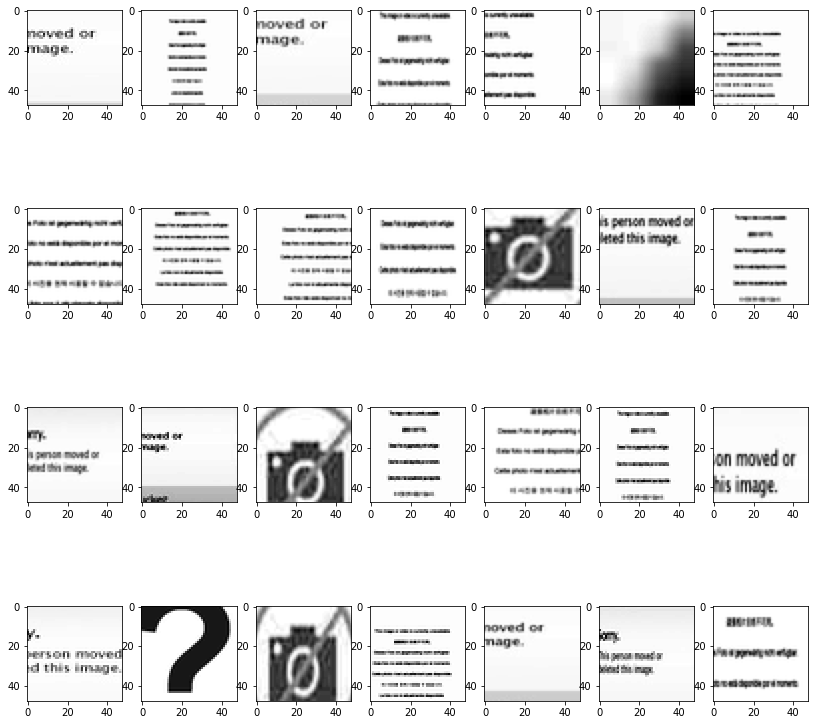

In [24]:
fig = pyplot.figure(1, (14, 14))
k = 1
for i in range(len(error_set)): 
    ax = pyplot.subplot(4,7,k)
    ax.imshow(error_set.iloc[i,1], cmap='gray')
    k += 1

In [25]:
## set threshold to 220
error_set220 = copy[(copy['mean'] >= 220) & (copy['mean'] < 230)]
error_set220.reset_index(drop=True, inplace = True)
error_set220

,emotion,pixels,mean
0,5,"[[255.0, 249.0, 246.0, 247.0, 248.0, 249.0, 24...",221.253906
1,0,"[[245.0, 221.0, 251.0, 254.0, 253.0, 255.0, 18...",223.685760
2,3,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",220.050354
3,2,"[[206.0, 203.0, 203.0, 206.0, 236.0, 255.0, 25...",226.347656
4,5,"[[255.0, 255.0, 255.0, 252.0, 255.0, 183.0, 15...",223.851135
5,3,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",224.223953
6,5,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",222.271698
7,4,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",224.969620
8,5,"[[254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 25...",228.647568
9,5,"[[254.0, 254.0, 254.0, 254.0, 254.0, 254.0, 25...",229.396698


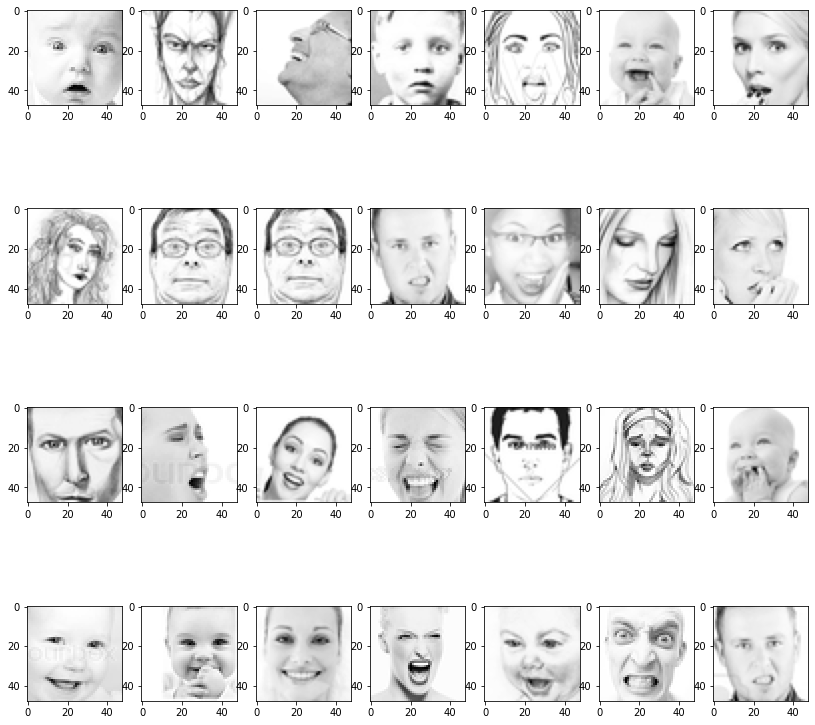

In [26]:
fig = pyplot.figure(1, (14, 14))
k = 1
for i in range(len(error_set220)): 
    ax = pyplot.subplot(4,7,k)
    ax.imshow(error_set220.iloc[i,1], cmap='gray')
    k += 1

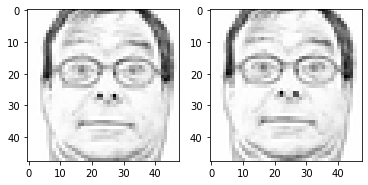

In [27]:
for i in range(2): 
    ax = pyplot.subplot(1,2,i+1)
    ax.imshow(error_set220.iloc[8+i,1], cmap='gray')

In [28]:
np.array_equal(error_set220.iloc[8,1], error_set220.iloc[9,1])

False

In [29]:
valid_face_df = copy[copy['mean'] <= 230]
valid_face_df.reset_index(drop=True, inplace = True)
valid_face_df

,emotion,pixels,mean
0,0,"[[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...",117.592880
1,0,"[[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...",126.971352
2,2,"[[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16...",160.814240
3,4,"[[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...",130.503479
4,6,"[[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",97.900177
...,...,...,...
34001,0,"[[181.0, 177.0, 176.0, 156.0, 178.0, 144.0, 13...",164.295135
34002,6,"[[50.0, 36.0, 17.0, 22.0, 23.0, 29.0, 33.0, 39...",63.258682
34003,3,"[[178.0, 174.0, 172.0, 173.0, 181.0, 188.0, 19...",171.759979
34004,0,"[[17.0, 17.0, 16.0, 23.0, 28.0, 22.0, 19.0, 17...",161.609802


In [30]:
valid_face_df['pixels'].dtypes

dtype('O')

### Convolutional Neural Network

In [60]:
# import scikitplot
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

In [32]:
np.array(valid_face_df['pixels'][0:2].values.tolist()).reshape(2,48,48,1).shape

(2, 48, 48, 1)

In [65]:
i_array = np.array(valid_face_df['pixels'].values.tolist())
# i_array = np.stack(image_array, axis=0)
i_array.shape

(34006, 48, 48)

In [33]:
image_array = np.array(valid_face_df['pixels'].values.tolist()).reshape(len(valid_face_df), 48, 48, 1)
image_array = np.stack(image_array, axis=0)
image_array.shape

(34006, 48, 48, 1)

In [34]:
le = LabelEncoder()
image_labels = le.fit_transform(valid_face_df.emotion)
image_labels = np_utils.to_categorical(image_labels)
image_labels.shape

(34006, 7)

In [35]:
image_labels[0:5]

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [36]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [66]:
x_t, x_test, y_t, y_test = train_test_split(i_array, image_labels,
                                           shuffle=True, stratify=image_labels,
                                           test_size = 0.3, random_state=42)
x_t.shape, x_test.shape, y_t.shape, y_test.shape

((23804, 48, 48), (10202, 48, 48), (23804, 7), (10202, 7))

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(image_array, image_labels,
                                                    shuffle=True, stratify=image_labels,
                                                    test_size=0.3, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((23804, 48, 48, 1), (10202, 48, 48, 1), (23804, 7), (10202, 7))

In [38]:
image_width = X_train.shape[1]
image_height = X_train.shape[2]
image_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [39]:
# Normalization
X_train = X_train / 255.
X_valid = X_valid / 255.

In [40]:
def build_net(optim):
    """
    This is a Deep Convolutional Neural Network (DCNN). For generalization purpose I used dropouts in regular intervals.
    I used `ELU` as the activation because it avoids dying relu problem but also performed well as compared to LeakyRelu
    atleast in this case. `he_normal` kernel initializer is used as it suits ELU. BatchNormalization is also used for better
    results.
    """
    net = Sequential(name='DCNN')

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(image_width, image_height, image_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_1'))
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    net.add(BatchNormalization(name='batchnorm_2'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    net.add(BatchNormalization(name='batchnorm_3'))
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    net.add(BatchNormalization(name='batchnorm_4'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    net.add(BatchNormalization(name='batchnorm_5'))
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    net.add(BatchNormalization(name='batchnorm_6'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    net.add(Flatten(name='flatten'))
        
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_7'))
    
    net.add(Dropout(0.6, name='dropout_4'))
    
    net.add(
        Dense(
            num_classes,
            activation='softmax',
            name='out_layer'
        )
    )
    
    net.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    
    net.summary()
    
    return net

In [41]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [42]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)

In [ ]:
batch_size = 32 #batch size of 32 performs the best.
epochs = 10
optims = [
    optimizers.Nadam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
#     optimizers.Adam(0.001),
]

# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with Nadam as it is more popular.
model = build_net(optims[0]) 
history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    use_multiprocessing=True
)

In [68]:
model_classify = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(48, 48)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7)
])

In [69]:
model_classify.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
model_classify.fit(x_t, y_t, epochs=10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-70-ba07b52a07f7>", line 1, in <module>
      model_classify.fit(x_t, y_t, epochs=10)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/liyutai/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [32,7] and labels shape [224]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1456]